# Assignment 5(due on 12/20)

## Student:高雨菲（12332295），Gtihub：gyfqwq
## 批改人：张鹏


## 得分：39/40+15/15

In [112]:
#1.1
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math
#读取文件
da=pd.read_csv('year-gama.csv')
def carbon_concentration_without_buffer(da):
    # 筛选1987年到2004年的数据
    ds = da[(da['Year'] >= 1987) & (da['Year'] <= 2004)]
    # 提取年份和CO2的数据
    years = ds['Year']
    gamas = ds['gama'] / 1000
    # 初始化变量用于存储结果
    carbon_concentration_without_buffer = []
    # 初始条件
    N1 = 740  # 大气中的碳浓度
    N2 = 900  # 海洋表面的碳浓度
    k12 = 105 / 740  # 大气到海洋的转移系数
    k21 = 102 / 900  # 海洋到大气的转移系数
    # 模拟计算1987年到2004年的碳浓度变化
    for i in range(len(years)):
        year = years.iloc[i]
        gama = gamas.iloc[i]
        dN1_dt = -k12 * N1 + k21 * N2 + gama
        dN2_dt = k12 * N1 - k21 * N2
        # 使用欧拉方法进行数值积分
        dt = 1  # 时间步长为1年
        N1 += dN1_dt * dt
        N2 += dN2_dt * dt
        # 存储每年的结果，将单位转换为ppm并保存在列表中
        carbon_concentration_without_buffer.append(N1 / 2.13)
        # 输出每年的结果，并将单位转换为ppm
        print("年份: {}, 大气中二氧化碳水平: {:.2f} ppm".format(year, N1 / 2.13))
    return carbon_concentration_without_buffer
# 调用函数进行碳浓度计算
carbon_concentration_without_buffer = carbon_concentration_without_buffer(da)

年份: 1987, 大气中二氧化碳水平: 348.71 ppm
年份: 1988, 大气中二氧化碳水平: 350.08 ppm
年份: 1989, 大气中二氧化碳水平: 351.47 ppm
年份: 1990, 大气中二氧化碳水平: 352.87 ppm
年份: 1991, 大气中二氧化碳水平: 354.27 ppm
年份: 1992, 大气中二氧化碳水平: 355.62 ppm
年份: 1993, 大气中二氧化碳水平: 356.95 ppm
年份: 1994, 大气中二氧化碳水平: 358.32 ppm
年份: 1995, 大气中二氧化碳水平: 359.75 ppm
年份: 1996, 大气中二氧化碳水平: 361.21 ppm
年份: 1997, 大气中二氧化碳水平: 362.70 ppm
年份: 1998, 大气中二氧化碳水平: 364.15 ppm
年份: 1999, 大气中二氧化碳水平: 365.56 ppm
年份: 2000, 大气中二氧化碳水平: 367.03 ppm
年份: 2001, 大气中二氧化碳水平: 368.57 ppm
年份: 2002, 大气中二氧化碳水平: 370.12 ppm
年份: 2003, 大气中二氧化碳水平: 371.83 ppm
年份: 2004, 大气中二氧化碳水平: 373.69 ppm


In [113]:
#1.2
def carbon_concentration_with_buffer(da):
    # 筛选1987年到2004年的数据
    ds = da[(da['Year'] >= 1987) & (da['Year'] <= 2004)]
    # 提取年份和CO2的数据
    years = ds['Year']
    gamas = ds['gama'] / 1000
    # 初始化变量用于存储结果
    carbon_concentration_with_buffer = []
    # 初始条件
    N1 = 740  # 大气中的碳浓度
    N2 = 900  # 海洋表面的碳浓度
    k12 = 105 / 740  # 大气到海洋的转移系数
    k21 = 102 / 900  # 海洋到大气的转移系数
    N20 = 821  # 海洋表层碳的平衡值
    # 模拟计算1987年到2004年的碳浓度变化
    for i in range(len(years)):
        year = years.iloc[i]
        gama = gamas.iloc[i]
        z = N1 / 2.13  # 以ppm为单位的大气二氧化碳浓度
        # 计算缓冲系数 xi
        xi = 3.69 + 1.86 * 10**(-2) * z - 1.80 * 10**(-6) * z**2
        dN1_dt = -k12 * N1 + k21 * (N20 + xi * (N2 - N20)) + gama
        dN2_dt = k12 * N1 - k21 * (N20 + xi * (N2 - N20))
        # 使用欧拉方法进行数值积分
        dt = 1  # 时间步长为1年
        N1 += dN1_dt * dt
        N2 += dN2_dt * dt
         # 存储每年的结果，将单位转换为ppm并保存在列表中
        carbon_concentration_with_buffer.append(N1 / 2.13)
        # 输出每年的结果，并将单位转换为ppm
        print("年份: {}, 大气中二氧化碳水平: {:.2f} ppm".format(year, N1 / 2.13))
    return carbon_concentration_with_buffer
# 调用函数进行碳浓度计算
carbon_concentration_with_buffer = carbon_concentration_with_buffer(da)

年份: 1987, 大气中二氧化碳水平: 386.27 ppm
年份: 1988, 大气中二氧化碳水平: 379.08 ppm
年份: 1989, 大气中二氧化碳水平: 384.82 ppm
年份: 1990, 大气中二氧化碳水平: 386.44 ppm
年份: 1991, 大气中二氧化碳水平: 389.42 ppm
年份: 1992, 大气中二氧化碳水平: 391.94 ppm
年份: 1993, 大气中二氧化碳水平: 394.61 ppm
年份: 1994, 大气中二氧化碳水平: 397.28 ppm
年份: 1995, 大气中二氧化碳水平: 400.03 ppm
年份: 1996, 大气中二氧化碳水平: 402.83 ppm
年份: 1997, 大气中二氧化碳水平: 405.68 ppm
年份: 1998, 大气中二氧化碳水平: 408.52 ppm
年份: 1999, 大气中二氧化碳水平: 411.34 ppm
年份: 2000, 大气中二氧化碳水平: 414.24 ppm
年份: 2001, 大气中二氧化碳水平: 417.21 ppm
年份: 2002, 大气中二氧化碳水平: 420.20 ppm
年份: 2003, 大气中二氧化碳水平: 423.40 ppm
年份: 2004, 大气中二氧化碳水平: 426.75 ppm


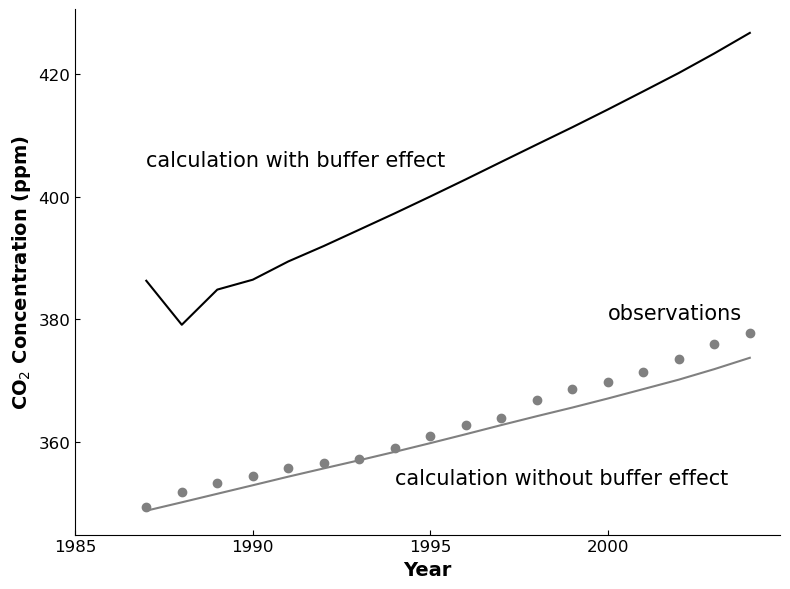

In [114]:
#1.3
# 读取数据
da2 = pd.read_csv('co2_annmean_mlo.csv')
# 筛选1987年到2004年的数据
da_filtered = da2[(da2['year'] >= 1987) & (da2['year'] <= 2004)]
# 获取筛选后的年份和二氧化碳浓度数据
years = da_filtered['year']
observations = da_filtered['mean']
# 绘制空白画布
plt.figure(figsize=(8, 6))
# 绘制观测点数据的散点图
plt.scatter(years, observations, color='grey')
# 绘制 carbon_concentration_without_buffer
plt.plot(years, carbon_concentration_without_buffer, color='grey', linestyle='-')
# 绘制 carbon_concentration_with_buffer
plt.plot(years, carbon_concentration_with_buffer, color='black', linestyle='-')
# 设置x轴和y轴刻度
plt.xticks([1985, 1990, 1995, 2000], fontsize=12)
plt.yticks([360, 380, 400, 420], fontsize=12)
# 插入文本
plt.text(1994, 353, 'calculation without buffer effect', fontsize=15, color='black')
plt.text(2000, 380, 'observations', fontsize=15, color='black')
plt.text(1987, 405, 'calculation with buffer effect', fontsize=15, color='black')
# 隐藏右边和上边的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# 设置刻度朝内
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in', which='both')
# 设置图表标签
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO$_{2}$ Concentration (ppm)', fontsize=14, fontweight='bold')
# 取消网格
plt.grid(False)
# 显示图表
plt.tight_layout()
plt.show()

### 第一问代码思路和结果正确，但是gama值未添加1986年的值
### 第二问代码思路和结果正确，但是gama值未添加1986年的值
### 第三问结果正确，报告分析完整。
### 得分38+1/40

C:\Users\a\AppData\Local\Temp\ipykernel_10828\1494711144.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LandUseChange'] = data['Global'] / (1000 * 2.13)
C:\Users\a\AppData\Local\Temp\ipykernel_10828\1494711144.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_emissions['FossilFuelEmissions'] = fossil_emissions.iloc[:, 1] - fossil_emissions.iloc[:, 2]
C:\Users\a\AppData\Local\Temp\ipykernel_10828\1494711144.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

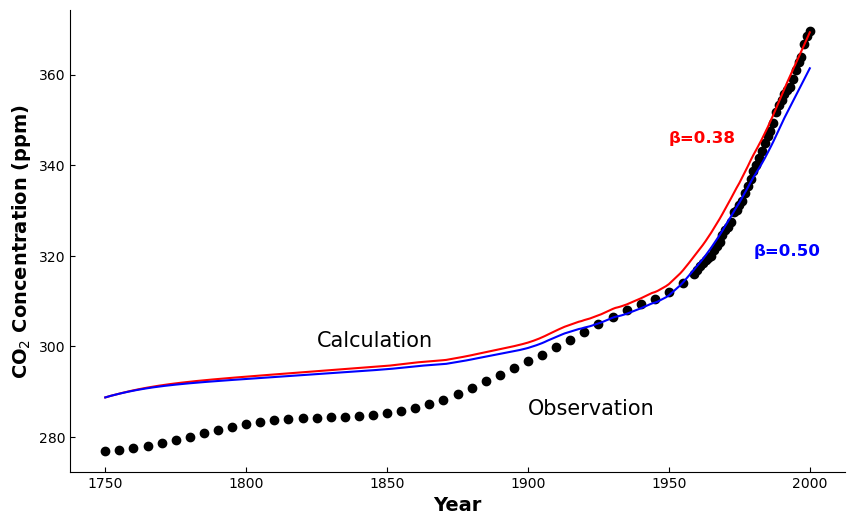

In [115]:
#bonus
#定义函数
def calculate_atmosphere_change(data, fossil_emissions, k_values, N2_0, initial_conditions, f0, P0, beta_values):
    results = []
    #对每个beta值进行迭代计算大气成分变化
    for beta in beta_values:
        atmosphere = [initial_conditions[0]]
        #在每年的计算中，根据给定的参数和初始条件，计算大气成分的变化率，并更新各个部分的值
        for year in range(1751, 2001):
            N1, N2, N3, N4, N5, N6, N7 = initial_conditions
            #计算gama和delta值
            gama = fossil_emissions[fossil_emissions['Year'] == year]['EmissionFactor'].values[0]
            delta = data[data['Year'] == year]['LandUseChange'].values[0]
            #计算xi值
            xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
            #更新f值
            f = f0 * (1 + beta * np.log(N1 / P0))
            #计算各个部分的变化率
            dN1_dt = -k_values[0] * N1 + k_values[1] * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k_values[9] * N5 + k_values[10] * N7
            dN2_dt = k_values[0] * N1 - k_values[1] * (N2_0 + xi * (N2 - N2_0)) - k_values[2] * N2 + k_values[3] * N3 - k_values[4] * N2
            dN3_dt = k_values[2] * N2 - k_values[3] * N3 - k_values[5] * N3 + k_values[6] * N4
            dN4_dt = k_values[5] * N3 - k_values[6] * N4 + k_values[4] * N2 - k_values[7] * N4
            dN5_dt = k_values[7] * N4 - k_values[9] * N5
            dN6_dt = f - k_values[8] * N6 - 2 * delta
            dN7_dt = k_values[8] * N6 - k_values[10] * N7 + delta
            #更新各个部分的值
            N1 += dN1_dt
            N2 += dN2_dt
            N3 += dN3_dt
            N4 += dN4_dt
            N5 += dN5_dt
            N6 += dN6_dt
            N7 += dN7_dt
            atmosphere.append(N1)
        #将每个beta值下的大气成分记录在results列表中，并在循环结束后返回结果
        results.append(atmosphere)
    return results
#使用函数进行数据加载、预处理和大气变化计算
observations, data, fossil_emissions = load_data('1750-2000CO2.csv', 'Global_land-use_flux-1750_2005.xls', 'global_1751_2016.csv')
data, fossil_emissions = preprocess_data(data, fossil_emissions)
#定义参数和初始条件
k_values = [60 / 615, 60 / 842, 9 / 842, 43 / 842, 52 / 9744, 162 / 9744, 205 / 26280, 0.2 / 26280, 0.2 / 90000000, 62 / 731, 62 / 1238]
N2_0 = 842 / 2.13
initial_conditions = [615 / 2.13, 842 / 2.13, 9744 / 2.13, 26280 / 2.13, 90000000 / 2.13, 731 / 2.13, 1238 / 2.13]
f0 = 62 / 2.13
P0 = 615 / 2.
#创建图表并设定大小
plt.figure(figsize=(10, 6))
#绘制观测数据的散点图，颜色设置为黑色
plt.scatter(observations['year'], observations['mean'], color='black')
#添加文本标注
plt.text(1825, 300, 'Calculation', fontsize=15, color='black')
plt.text(1900, 285, 'Observation', fontsize=15, color='black')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold', color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold', color='blue')
#直接绘制每个β值的结果，颜色分别为红色和蓝色
plt.plot(range(1750, 2001), results[0], color='red', label='β=0.38')
plt.plot(range(1750, 2001), results[1], color='blue', label='β=0.50')
#设置图表标签
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO$_{2}$ Concentration (ppm)', fontsize=14, fontweight='bold')
#隐藏右边和上边的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#设置刻度朝内
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in', which='both')
#显示图表
plt.show()

### 第三问代码思路和结果基本正确报告分析完整。
### 得分15/15